In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import shap
shap.initjs()
import warnings
warnings.simplefilter('ignore')

In [2]:
fao_data = pd.read_csv("datasets/latest0705.csv", index_col='Unnamed: 0')

fao_data['Crop_season'].value_counts()

Spring        591
Summer        381
Year-Round    274
Autumn        152
Fall          145
Winter         31
Name: Crop_season, dtype: int64

In [3]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

In [5]:
shap_df = pd.DataFrame()
shap_df_dist = pd.DataFrame()

In [17]:
scaler = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    encoded_df = pd.get_dummies(crop_df[["Crop_season"]], prefix='', prefix_sep='')
    print(encoded_df.columns)

    y = crop_df[['Yield(tonnes/ha)']]
    x = crop_df.drop(['Yield(tonnes/ha)', "Item", "Category", "Crop_season"], axis=1)
    x = pd.concat([x, encoded_df], axis=1)
    
    mean = x.mean()
    std = x.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    x = x.clip(lower_bound, upper_bound, axis=1)
    index = x.index.copy()
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    x.index = index

    
   
    #display(x)

    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    
    regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)
    regressor.fit(x_train, y_train)
    
    # #prediction of new value
    y_pred = regressor.predict(x_test)

    #shap implementation
    #     #shap implementation
    explainer = shap.TreeExplainer(regressor)
    shap_values = explainer.shap_values(x_test)
    explainer = shap.TreeExplainer(regressor)
    
    shap_values = explainer.shap_values(x_test)
    

    shap_df_crop = pd.DataFrame(shap_values, columns=x_test.columns)
    shap_df_crop['Year_ind'] = x_test.index
    shap_df_crop['Category_ind'] = cat

    shap_df_dist = pd.concat([shap_df_dist, shap_df_crop])
    display(shap_df_crop)
    
   


Index(['Autumn', 'Spring', 'Summer', 'Year-Round'], dtype='object')


,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,"Fung & Bact – Triazoles, diazoles",Herbicides – Amides,...,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3,Autumn,Spring,Summer,Year-Round,Year_ind,Category_ind
0,-0.012918,-0.056480,-0.028491,-0.020166,-0.031824,-0.085684,0.003961,-0.029768,-0.056378,-0.046753,...,0.002316,0.022003,0.030017,0.024495,0.066380,0.001121,2.728148,0.168208,2017-01-01,Fruits and Nuts
1,-0.001319,-0.006007,-0.003524,-0.001855,-0.002321,-0.009997,-0.000078,-0.008623,-0.008910,-0.003267,...,0.004358,0.008821,0.012396,0.007279,0.217614,0.066473,-1.775507,0.030293,2017-01-01,Fruits and Nuts
2,-0.001548,-0.007030,-0.003637,-0.002155,-0.003234,-0.011687,0.000106,-0.007480,-0.009489,-0.005060,...,0.001575,0.008188,0.010633,0.006133,0.110071,0.008200,3.563720,0.024966,2017-01-01,Fruits and Nuts
3,-0.000890,-0.005592,-0.002685,-0.001576,-0.002148,-0.008963,-0.000038,-0.008699,-0.008328,-0.002384,...,0.001092,0.005198,0.004540,0.003074,0.142186,-0.154174,-2.285368,-0.163131,2017-01-01,Fruits and Nuts
4,-0.005295,-0.022504,-0.018164,-0.007960,-0.013328,-0.041559,-0.000879,-0.017177,-0.026852,-0.011785,...,0.002651,0.012029,0.005242,0.007554,0.134318,0.073073,-3.797707,-0.610204,2017-01-01,Fruits and Nuts
5,-0.002119,-0.007312,-0.004031,-0.002117,-0.003381,-0.011684,-0.000282,-0.008938,-0.010471,-0.005093,...,0.004932,0.020450,0.025612,0.007728,0.091262,0.012296,1.700345,0.017582,2017-01-01,Fruits and Nuts
6,-0.001388,-0.007659,-0.003345,-0.002096,-0.003221,-0.011566,0.000115,-0.007549,-0.010112,-0.004510,...,0.001925,0.012963,0.011598,0.011547,0.105447,-0.018315,2.418235,0.025601,2017-01-01,Fruits and Nuts
7,-0.001434,-0.007677,-0.003220,-0.002106,-0.003583,-0.011234,0.000097,-0.008825,-0.009279,-0.004727,...,0.001146,0.006769,0.010469,0.013035,0.098269,0.007843,2.774446,0.026868,2017-01-01,Fruits and Nuts
8,-0.001533,-0.005341,-0.003393,-0.001772,-0.002336,-0.009884,-0.000224,-0.008618,-0.008949,-0.003242,...,0.002464,0.013544,0.009793,0.006014,0.272379,0.020089,-2.678628,-0.000823,2017-01-01,Fruits and Nuts
9,-0.001793,-0.007317,-0.003974,-0.002117,-0.003381,-0.011461,-0.000322,-0.008463,-0.010026,-0.004964,...,0.002397,0.032563,0.015423,-0.002122,0.122649,0.013383,1.848119,0.019299,2017-01-01,Fruits and Nuts


Index(['Fall', 'Spring', 'Summer', 'Winter', 'Year-Round'], dtype='object')


,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,"Fung & Bact – Triazoles, diazoles",Herbicides – Amides,...,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3,Fall,Spring,Summer,Winter,Year-Round,Year_ind,Category_ind
0,0.001196,0.003992,0.266669,0.004583,0.001832,0.001243,0.029241,0.006644,0.001689,0.001752,...,-0.033037,0.012989,-0.022073,-0.040063,-2.336541,-9.996461,-0.019087,0.448701,2017-01-01,Vegetables and Legumes
1,0.002443,0.010774,0.407441,0.007920,0.002379,0.003391,0.071665,0.009037,0.004631,0.003880,...,0.048958,0.030635,0.085281,-0.811102,0.250704,-9.803603,-0.016798,-0.112861,2017-01-01,Vegetables and Legumes
2,0.000691,0.002566,1.268328,0.001559,0.000842,0.000670,0.219651,0.001902,0.000825,0.001153,...,0.117060,0.167771,0.196572,0.367124,-0.225353,-4.416084,-0.023983,0.322566,2017-01-01,Vegetables and Legumes
3,0.001021,0.003253,0.902413,0.003441,0.001473,0.001005,0.323014,0.003280,0.001549,0.002767,...,0.143823,0.120313,0.136657,-0.658256,-0.826841,132.283756,-0.015208,0.334377,2017-01-01,Vegetables and Legumes
4,-0.018103,-0.067864,0.312928,-0.012473,-0.020543,0.002480,0.100942,-0.024119,0.009839,0.003559,...,0.013911,0.022482,0.051139,-2.857386,0.565455,-13.777966,-0.020945,-0.091403,2018-01-01,Vegetables and Legumes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.001590,0.002018,0.408055,0.001846,0.002774,0.000641,0.004688,0.002768,0.000808,0.001420,...,-0.002255,-0.002337,-0.034853,0.528318,-1.196928,-10.207470,1.255107,0.841996,2020-01-01,Vegetables and Legumes
63,0.001241,0.003948,0.316445,0.005000,0.003416,0.001211,-0.007305,0.007188,0.001422,0.001760,...,0.041508,0.028886,0.039640,0.159157,-1.831461,-10.099377,-0.019600,0.484803,2020-01-01,Vegetables and Legumes
64,0.001324,0.006791,0.353046,0.005839,0.003012,0.003224,0.027474,0.007075,0.002332,0.003749,...,-0.009124,-0.039074,-0.054909,-0.726699,0.186440,-9.735814,-0.016473,-0.303361,2020-01-01,Vegetables and Legumes
65,0.000765,0.002512,1.158021,0.001838,0.001199,0.000712,0.098146,0.002506,0.000819,0.001279,...,-0.026777,-0.074704,-0.109868,0.201006,-0.292020,-4.859376,-0.024813,-0.238848,2020-01-01,Vegetables and Legumes


Index(['Autumn', 'Spring', 'Summer'], dtype='object')


,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,"Fung & Bact – Triazoles, diazoles",Herbicides – Amides,...,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3,Autumn,Spring,Summer,Year_ind,Category_ind
0,0.000916,0.002171,0.004468,0.000484,0.002061,0.001702,0.004682,0.002120,0.001341,0.000674,...,0.000148,-0.000101,0.004730,0.004650,0.001541,0.123463,0.130629,-0.271900,2017-01-01,Cereals
1,0.002894,-0.001159,0.000833,-0.006858,-0.007019,-0.000517,0.011364,0.000088,0.005485,0.000017,...,0.000463,-0.000178,0.003143,0.001607,-0.006954,0.021612,-0.032369,-0.204835,2018-01-01,Cereals
2,0.000209,0.000761,0.001510,-0.000012,0.000436,0.000583,0.001597,0.000767,0.000735,0.000193,...,0.000136,-0.000121,0.002538,0.007821,0.003405,-0.064328,0.034765,1.789246,2018-01-01,Cereals
3,0.000171,-0.000552,0.000327,-0.000938,-0.000229,-0.001045,0.000350,0.000719,-0.000227,-0.000358,...,-0.003455,-0.000070,0.002327,0.001125,-0.029872,-0.049095,-0.021641,-0.162808,2018-01-01,Cereals
4,0.000696,0.001933,0.003705,0.000825,0.002099,0.001901,0.004343,0.001565,0.001282,0.000617,...,0.000105,-0.000203,0.003210,0.003181,0.000965,-0.164094,-0.163210,-0.400733,2018-01-01,Cereals
5,0.000875,0.001816,0.003720,0.000373,0.001909,0.001357,0.004057,0.001681,0.001146,0.000373,...,0.000181,-0.000102,0.001956,0.000416,-0.002558,0.088859,0.095896,-0.332113,2018-01-01,Cereals
6,0.000741,0.001815,0.003738,0.000425,0.001546,0.001429,0.004120,0.001676,0.001491,0.000513,...,0.000208,-0.000087,0.000728,0.003193,-0.000554,0.084990,0.092611,-0.321278,2018-01-01,Cereals
7,0.002076,0.003452,0.004790,-0.000275,0.002594,0.001784,0.004119,0.004416,0.001004,0.000550,...,0.000488,-0.000099,0.006654,0.007779,0.004518,0.116773,0.123058,-0.289590,2018-01-01,Cereals
8,-0.002843,-0.000146,0.002333,-0.005376,0.005082,0.002753,0.011339,-0.000234,-0.005578,0.000090,...,0.000293,-0.000410,0.004184,0.004676,0.000719,-0.264481,-0.258840,-0.386920,2019-01-01,Cereals
9,0.000175,0.000819,0.001630,0.000159,0.000546,0.000679,0.001784,0.000861,0.001696,0.000166,...,0.000161,-0.000120,0.006776,0.003482,0.004930,-0.082960,0.040054,1.653719,2019-01-01,Cereals


Index(['Spring', 'Summer', 'Year-Round'], dtype='object')


,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,"Fung & Bact – Triazoles, diazoles",Herbicides – Amides,...,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3,Spring,Summer,Year-Round,Year_ind,Category_ind
0,-3.009745e-04,-0.000025,0.000207,0.000227,0.000203,0.000674,0.000583,0.000883,0.000310,-0.000143,...,0.010045,0.000127,0.006014,0.009285,0.007840,0.589879,0.037574,-0.020995,2016-01-01,Industrial_crops
1,-4.069651e-05,-0.000311,-0.000013,0.000027,0.000074,-0.000158,-0.000073,0.000106,-0.000061,-0.000037,...,0.001389,0.000132,0.015516,0.015027,0.013716,0.110091,0.003797,-0.021322,2016-01-01,Industrial_crops
2,-1.901865e-05,-0.000231,0.000119,0.000066,0.000075,-0.000005,0.000046,0.000134,-0.000015,-0.000032,...,0.003627,0.000138,0.000932,0.002313,0.000845,-0.743222,-0.140764,-0.019441,2016-01-01,Industrial_crops
3,-5.774663e-08,-0.000032,0.000032,0.000072,0.000127,-0.000265,-0.000078,0.000002,-0.000115,0.000207,...,0.001031,0.000380,0.000896,0.003129,0.003874,-0.143420,0.005169,0.213973,2016-01-01,Industrial_crops
4,-5.918751e-04,-0.000786,-0.001233,-0.000806,0.000088,0.006319,0.004631,0.002678,0.000318,-0.000123,...,0.000766,0.000085,0.002174,0.002672,0.001701,0.111263,0.005603,-0.063267,2017-01-01,Industrial_crops
5,-4.325053e-05,-0.000175,0.000053,0.000065,0.000104,-0.000033,0.000023,0.000282,-0.000047,0.000016,...,0.002331,0.000119,-0.000023,0.001065,-0.001193,-0.678141,-0.120849,-0.020655,2017-01-01,Industrial_crops
6,9.981156e-06,-0.000430,-0.000050,0.000092,0.000147,-0.000430,-0.000300,-0.000073,-0.000352,0.000092,...,0.001774,0.000965,0.002745,0.001459,0.000808,0.091830,0.004467,-0.053134,2017-01-01,Industrial_crops
7,6.200961e-05,-0.000741,0.000024,0.000071,0.000238,-0.000495,-0.000253,0.000056,-0.000338,-0.000045,...,0.001139,0.001056,0.003355,0.002403,0.002238,0.113554,0.005592,-0.065921,2017-01-01,Industrial_crops
8,-2.959133e-04,0.000008,0.000188,0.000200,0.000220,0.000688,0.000622,0.001322,0.000290,-0.000123,...,0.010162,0.000113,0.004261,0.007002,0.005661,0.566647,0.036617,-0.021439,2017-01-01,Industrial_crops
9,-3.826910e-05,-0.000310,-0.000024,0.000028,0.000070,-0.000136,-0.000066,0.000167,-0.000072,-0.000016,...,0.001347,0.000121,0.014454,0.013168,0.012031,0.107929,0.003378,-0.021979,2017-01-01,Industrial_crops


In [18]:
shap_df_dist

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,"Fung & Bact – Triazoles, diazoles",Herbicides – Amides,...,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3,Autumn,Spring,Summer,Year-Round,Year_ind,Category_ind,Fall,Winter
0,-0.012918,-0.056480,-0.028491,-0.020166,-0.031824,-0.085684,0.003961,-0.029768,-0.056378,-0.046753,...,0.030017,0.024495,0.066380,0.001121,2.728148,0.168208,2017-01-01,Fruits and Nuts,NaN,NaN
1,-0.001319,-0.006007,-0.003524,-0.001855,-0.002321,-0.009997,-0.000078,-0.008623,-0.008910,-0.003267,...,0.012396,0.007279,0.217614,0.066473,-1.775507,0.030293,2017-01-01,Fruits and Nuts,NaN,NaN
2,-0.001548,-0.007030,-0.003637,-0.002155,-0.003234,-0.011687,0.000106,-0.007480,-0.009489,-0.005060,...,0.010633,0.006133,0.110071,0.008200,3.563720,0.024966,2017-01-01,Fruits and Nuts,NaN,NaN
3,-0.000890,-0.005592,-0.002685,-0.001576,-0.002148,-0.008963,-0.000038,-0.008699,-0.008328,-0.002384,...,0.004540,0.003074,0.142186,-0.154174,-2.285368,-0.163131,2017-01-01,Fruits and Nuts,NaN,NaN
4,-0.005295,-0.022504,-0.018164,-0.007960,-0.013328,-0.041559,-0.000879,-0.017177,-0.026852,-0.011785,...,0.005242,0.007554,0.134318,0.073073,-3.797707,-0.610204,2017-01-01,Fruits and Nuts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,-0.000257,-0.001166,0.000198,0.000166,0.000152,-0.000621,-0.000188,-0.000075,-0.000643,-0.000020,...,-0.001461,-0.001692,NaN,-0.139305,-0.019869,-0.056582,2019-01-01,Industrial_crops,NaN,NaN
20,0.002092,0.004124,-0.001067,-0.001356,0.001152,0.005398,0.001549,-0.003054,0.000126,0.000177,...,0.002392,0.005589,NaN,0.217187,0.006843,-0.019135,2020-01-01,Industrial_crops,NaN,NaN
21,-0.000084,-0.000438,-0.000149,0.000029,0.000060,-0.000400,-0.000270,-0.000194,-0.000492,-0.000160,...,-0.001584,0.000607,NaN,0.106653,0.005375,-0.063119,2020-01-01,Industrial_crops,NaN,NaN
22,0.000045,-0.000314,-0.000024,0.000007,0.000120,-0.000282,-0.000145,-0.000253,-0.000169,-0.000078,...,0.001077,-0.000423,NaN,0.100799,0.005025,-0.052257,2020-01-01,Industrial_crops,NaN,NaN


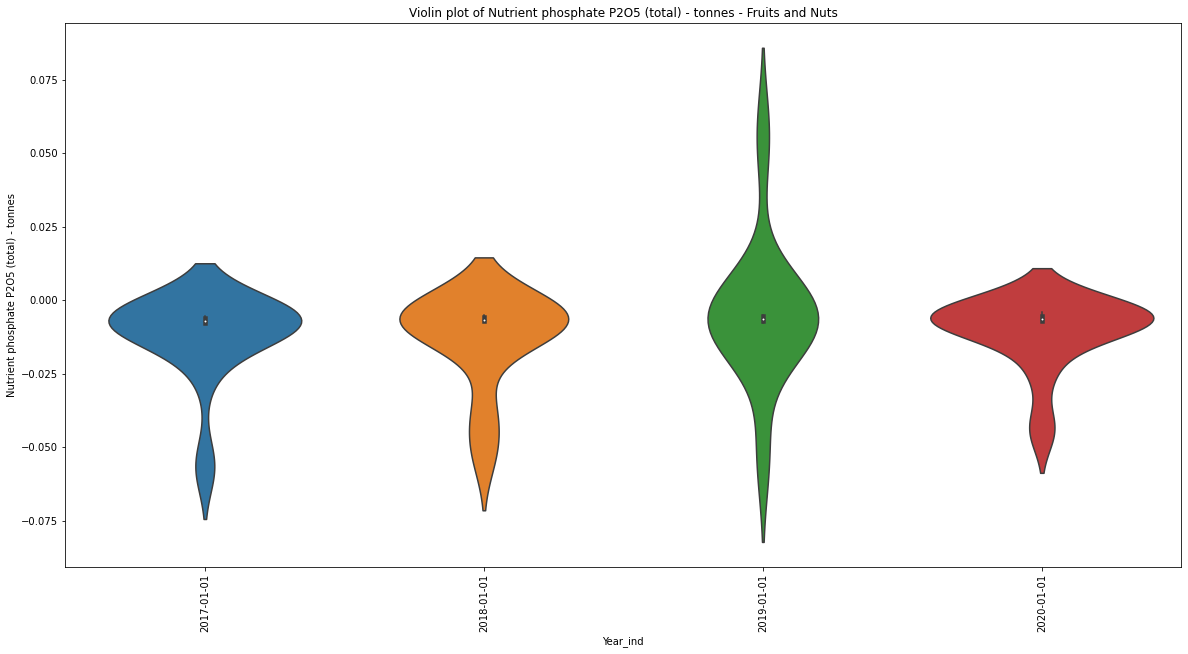

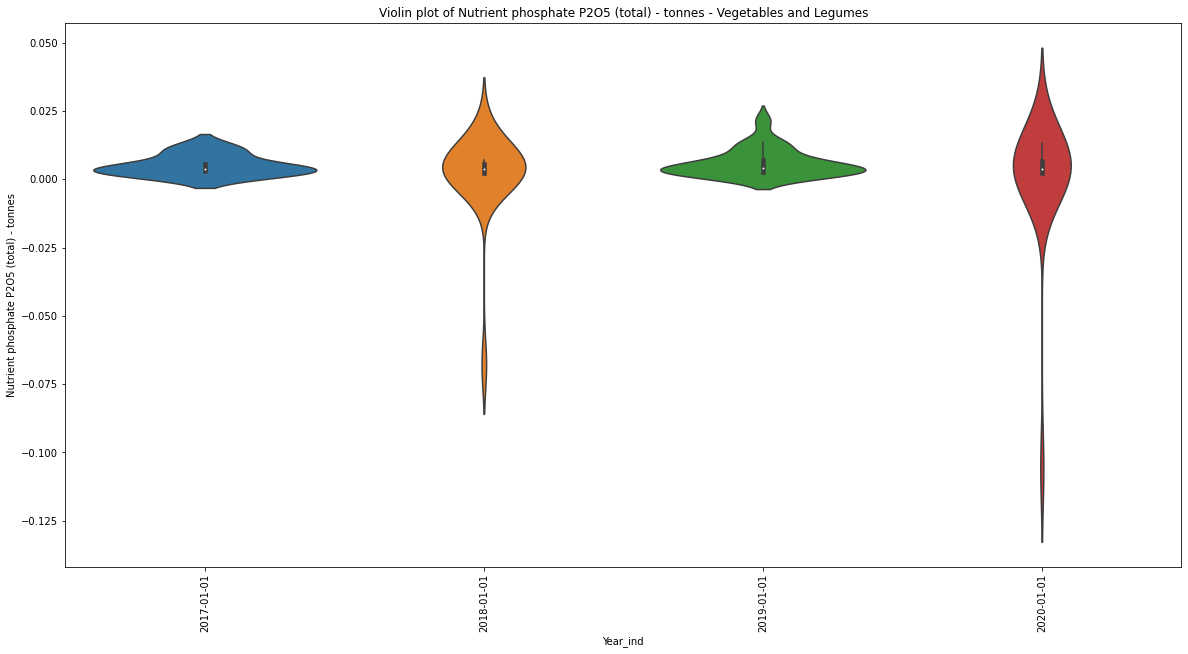

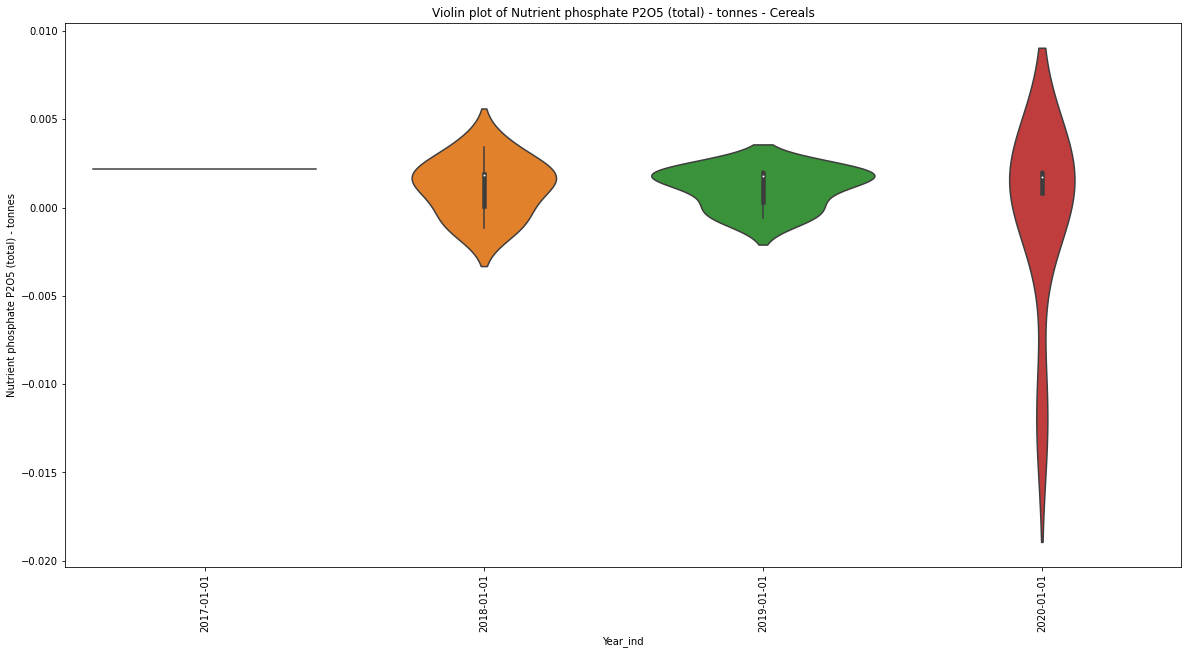

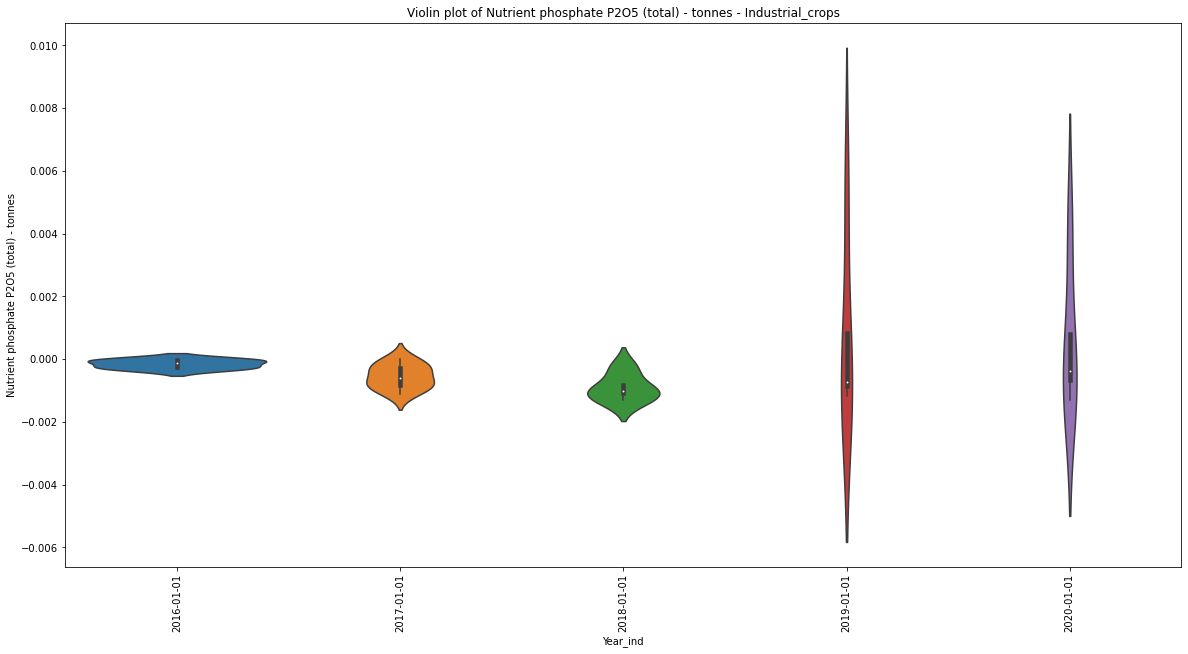

In [27]:
#sorted_df = shap_df.iloc[abs(shap_df['mean_shap_value']).argsort()]
# Select the top 10 rows
import seaborn as sns
import matplotlib.pyplot as plt

for cat in cat_names:
    dist_df = shap_df_dist[shap_df_dist['Category_ind'] == cat]
    average_values = dist_df.groupby('Year_ind')['Nutrient phosphate P2O5 (total) - tonnes'].mean()
    
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.violinplot(x=dist_df['Year_ind'], y=dist_df['Nutrient phosphate P2O5 (total) - tonnes'], ax=ax)
    #ax.plot(average_values.index, average_values, color='red', linestyle='dashed', linewidth=2)
    
    ax.set_xticklabels(dist_df['Year_ind'].unique(), rotation=90)
    ax.set_ylabel('Nutrient phosphate P2O5 (total) - tonnes')
    ax.set_title(f'Violin plot of Nutrient phosphate P2O5 (total) - tonnes - {cat}')
    plt.show()



    

In [6]:
shap_values = pd.DataFrame(explainer.shap_values(x_test), columns= x_test.columns)
shap_values

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,"Fung & Bact – Triazoles, diazoles",Herbicides – Amides,...,Herbicides – Bipiridils-3,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3,Spring,Summer,Year-Round
0,-3.009745e-04,-0.000025,0.000207,0.000227,0.000203,0.000674,0.000583,0.000883,0.000310,-0.000143,...,0.000162,0.000307,0.010045,0.000127,0.006014,0.009285,0.007840,0.589879,0.037574,-0.020995
1,-4.069651e-05,-0.000311,-0.000013,0.000027,0.000074,-0.000158,-0.000073,0.000106,-0.000061,-0.000037,...,0.000190,0.000167,0.001389,0.000132,0.015516,0.015027,0.013716,0.110091,0.003797,-0.021322
2,-1.901865e-05,-0.000231,0.000119,0.000066,0.000075,-0.000005,0.000046,0.000134,-0.000015,-0.000032,...,0.000155,0.002786,0.003627,0.000138,0.000932,0.002313,0.000845,-0.743222,-0.140764,-0.019441
3,-5.774663e-08,-0.000032,0.000032,0.000072,0.000127,-0.000265,-0.000078,0.000002,-0.000115,0.000207,...,0.000567,0.000932,0.001031,0.000380,0.000896,0.003129,0.003874,-0.143420,0.005169,0.213973
4,-5.918751e-04,-0.000786,-0.001233,-0.000806,0.000088,0.006319,0.004631,0.002678,0.000318,-0.000123,...,0.000283,0.000101,0.000766,0.000085,0.002174,0.002672,0.001701,0.111263,0.005603,-0.063267
5,-4.325053e-05,-0.000175,0.000053,0.000065,0.000104,-0.000033,0.000023,0.000282,-0.000047,0.000016,...,0.000134,-0.007773,0.002331,0.000119,-0.000023,0.001065,-0.001193,-0.678141,-0.120849,-0.020655
6,9.981156e-06,-0.000430,-0.000050,0.000092,0.000147,-0.000430,-0.000300,-0.000073,-0.000352,0.000092,...,0.000839,0.000743,0.001774,0.000965,0.002745,0.001459,0.000808,0.091830,0.004467,-0.053134
7,6.200961e-05,-0.000741,0.000024,0.000071,0.000238,-0.000495,-0.000253,0.000056,-0.000338,-0.000045,...,-0.000108,0.000237,0.001139,0.001056,0.003355,0.002403,0.002238,0.113554,0.005592,-0.065921
8,-2.959133e-04,0.000008,0.000188,0.000200,0.000220,0.000688,0.000622,0.001322,0.000290,-0.000123,...,0.000156,0.000496,0.010162,0.000113,0.004261,0.007002,0.005661,0.566647,0.036617,-0.021439
9,-3.826910e-05,-0.000310,-0.000024,0.000028,0.000070,-0.000136,-0.000066,0.000167,-0.000072,-0.000016,...,0.000204,0.000163,0.001347,0.000121,0.014454,0.013168,0.012031,0.107929,0.003378,-0.021979


In [7]:
shap_df = shap_df.add_prefix('mean shap values (Random Forest)_')
shap_df.loc[['Summer']]

,mean shap values (Random Forest)_Fruits and Nuts,mean shap values (Random Forest)_Vegetables and Legumes,mean shap values (Random Forest)_Cereals,mean shap values (Random Forest)_Industrial_crops
Summer,0.586112,3.129636,-0.022892,-0.007673


In [8]:
shap_df['mean_shap_value'] = shap_df.mean(axis=1)
shap_df

,mean shap values (Random Forest)_Fruits and Nuts,mean shap values (Random Forest)_Vegetables and Legumes,mean shap values (Random Forest)_Cereals,mean shap values (Random Forest)_Industrial_crops,mean_shap_value
Nutrient nitrogen N (total) - tonnes,-0.002461,0.000479,0.000622,0.000005,-0.000339
Nutrient phosphate P2O5 (total) - tonnes,-0.010293,0.002861,0.000702,-0.000162,-0.001723
Nutrient potash K2O (total) - tonnes,-0.004006,0.511891,0.002927,-0.000109,0.127676
Fung & Bact – Benzimidazoles,-0.002951,0.003166,-0.000658,-0.000120,-0.000141
"Fung & Bact – Diazines, morpholines",-0.005767,0.001256,0.000617,0.000178,-0.000929
...,...,...,...,...,...
Rodenticides – Anti-coagulants-3,0.007438,-0.035994,-0.002748,0.002740,-0.007141
Autumn,0.112708,NaN,-0.017647,NaN,0.047531
Spring,0.025697,-0.116874,0.003622,0.012759,-0.018699
Summer,0.586112,3.129636,-0.022892,-0.007673,0.921296


In [12]:

shap_df

mean_shap = shap_df['mean_shap_value'].mean()
#sorted_df = shap_df.iloc[abs(shap_df['mean_shap_value']).argsort()]
# Select the top 10 rows
sorted_df = shap_df.reindex(shap_df['mean_shap_value'].abs().sort_values(ascending=False).index)
vals = list(fao_data["Crop_season"].unique())
vals.remove('Winter')
#vals.remove(np.nan)
vals.remove('Fall')


vals = vals + ["Yield(tonnes/ha)-3", "Yield(tonnes/ha)-2","Yield(tonnes/ha)-1"]
print(vals)
sorted_df2 = sorted_df.drop(vals, axis = 0)
top_10 = sorted_df2.head(10)

#sorted_means = sorted(mean_shap, key=abs, reverse=True)
#top_values = sorted_means[:10]
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(top_10.index, top_10['mean_shap_value'])
ax.axhline(top_10['mean_shap_value'].mean(), color='red', linestyle='dashed', linewidth=2)
ax.set_xticklabels(top_10.index, rotation=90)
ax.set_ylabel('Mean_shap_values')
ax.set_title('Bar plot of features and mean shap value for all crops')
plt.show()


,mean shap values (Random Forest)_Fruits and Nuts,mean shap values (Random Forest)_Vegetables and Legumes,mean shap values (Random Forest)_Cereals,mean shap values (Random Forest)_Industrial_crops,mean_shap_value
Nutrient nitrogen N (total) - tonnes,-0.002461,0.000479,0.000622,0.000005,-0.000339
Nutrient phosphate P2O5 (total) - tonnes,-0.010293,0.002861,0.000702,-0.000162,-0.001723
Nutrient potash K2O (total) - tonnes,-0.004006,0.511891,0.002927,-0.000109,0.127676
Fung & Bact – Benzimidazoles,-0.002951,0.003166,-0.000658,-0.000120,-0.000141
"Fung & Bact – Diazines, morpholines",-0.005767,0.001256,0.000617,0.000178,-0.000929
...,...,...,...,...,...
Rodenticides – Anti-coagulants-3,0.007438,-0.035994,-0.002748,0.002740,-0.007141
Autumn,0.112708,NaN,-0.017647,NaN,0.047531
Spring,0.025697,-0.116874,0.003622,0.012759,-0.018699
Summer,0.586112,3.129636,-0.022892,-0.007673,0.921296


In [9]:
def select_top_values(means, num_values):
    sorted_means = sorted(means, key=abs, reverse=True)  # Sort the means by their absolute values in descending order
    top_values = sorted_means[:num_values]  # Select the top 'num_values' from the sorted list
    return top_values

In [ ]:
shap_df.loc[['Summer']]

,mean shap values (Random Forest)_Fruits and Nuts,mean shap values (Random Forest)_Vegetables and Legumes,mean shap values (Random Forest)_Cereals,mean shap values (Random Forest)_Industrial_crops,mean_shap_value
Summer,0.586112,3.129636,-0.022892,-0.007673,0.921296


['Summer', 'Spring', 'Autumn', 'Year-Round', 'Yield(tonnes/ha)-3', 'Yield(tonnes/ha)-2', 'Yield(tonnes/ha)-1']


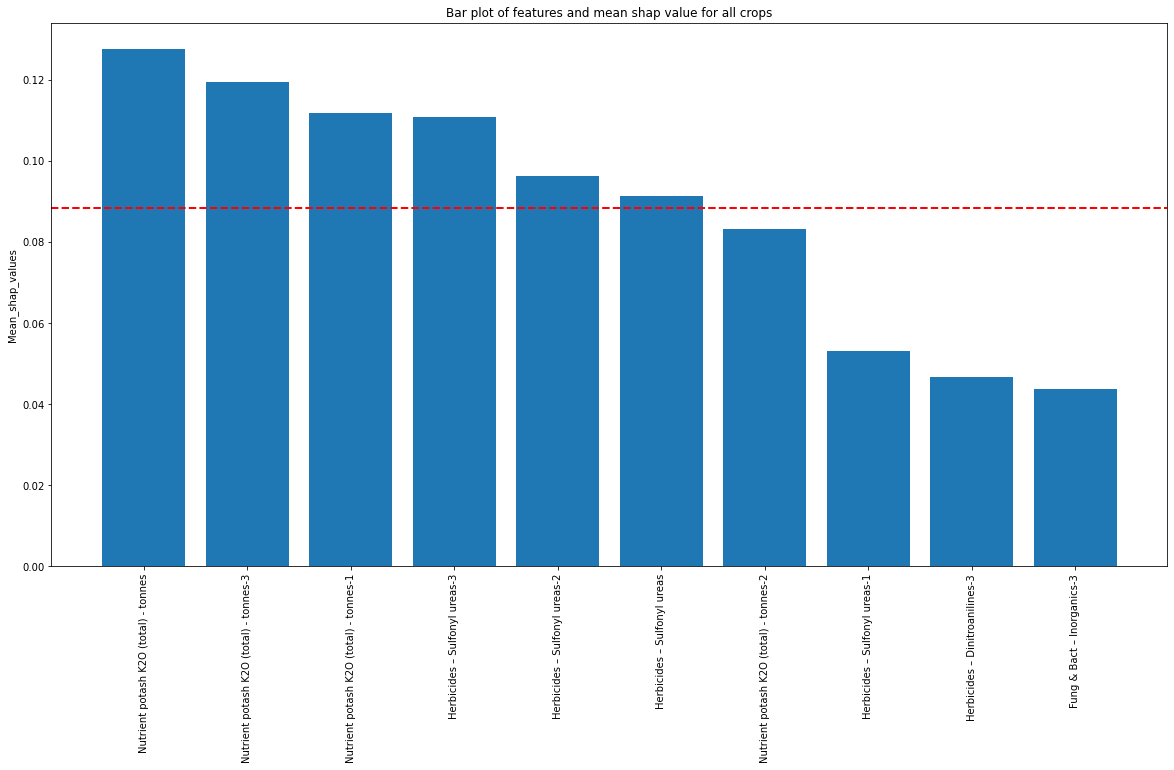

In [11]:
mean_shap = shap_df['mean_shap_value'].mean()
#sorted_df = shap_df.iloc[abs(shap_df['mean_shap_value']).argsort()]
# Select the top 10 rows
sorted_df = shap_df.reindex(shap_df['mean_shap_value'].abs().sort_values(ascending=False).index)
vals = list(fao_data["Crop_season"].unique())
vals.remove('Winter')
#vals.remove(np.nan)
vals.remove('Fall')


vals = vals + ["Yield(tonnes/ha)-3", "Yield(tonnes/ha)-2","Yield(tonnes/ha)-1"]
print(vals)
sorted_df2 = sorted_df.drop(vals, axis = 0)
top_10 = sorted_df2.head(10)

#sorted_means = sorted(mean_shap, key=abs, reverse=True)
#top_values = sorted_means[:10]
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(top_10.index, top_10['mean_shap_value'])
ax.axhline(top_10['mean_shap_value'].mean(), color='red', linestyle='dashed', linewidth=2)
ax.set_xticklabels(top_10.index, rotation=90)
ax.set_ylabel('Mean_shap_values')
ax.set_title('Bar plot of features and mean shap value for all crops')
plt.show()